In [26]:
# --- Initialisation ---
import os
import sys
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import recall_score, make_scorer

from scipy.stats import loguniform, uniform

# --- Accès au dossier contenant utils.py ---
sys.path.append(os.path.abspath(".."))
from utils import execute_model_and_save_score

# --- Chargement des données ---
# DF_PATH = "../data/cardio_optimized.csv"
# DF_PATH = "../data/cardio_light.csv"
DF_PATH = "../data/cardio_light_std.csv"


df = pd.read_csv(DF_PATH, sep=";")

# --- Séparation des features et de la cible ---
X = df.drop(columns=["cardio"])
y = df["cardio"]


# 1. Créer un scorer personnalisé pour le recall de la classe 1
recall_scorer = make_scorer(
    recall_score, 
    pos_label=1  # Spécifie explicitement que la classe 1 est la classe positive
)


#### Recherche des meilleurs hyperparamètre de `LogisticRegression` avec `GridSearchCV`

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

param_grid = {
    'C': [50, 100, 150, 200],
    'penalty': ['l2'],  # ou 'l1' si le solver le permet
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000]
}

model = LogisticRegression()
grid_search = GridSearchCV(model, 
                           param_grid, 
                           cv=5, 
                        #    scoring='recall'
                           scoring=recall_scorer  # Optimise spécifiquement le recall de la classe 1
                           )
grid_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres trouvés :", grid_search.best_params_)
print("Meilleur score d'entraînement :", grid_search.best_score_)



c:\Users\coule\Documents\projets\cardio-vasc-risks\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\coule\Documents\projets\cardio-vasc-risks\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Meilleurs hyperparamètres trouvés : {'C': 150, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Meilleur score d'entraînement : 0.6844220333676283


#### Recherche des meilleurs hyperparamètre de `LogisticRegression` avec `RandomizedSearchCV`

In [ ]:
model=LogisticRegression()

param_distributions = {
    'C':  [150, 200], # C variera de 0.01 à 100, selon une distribution log-uniforme
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [500]
}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


randomized_search = RandomizedSearchCV(
    estimator = model,
    param_distributions=param_distributions,  # ou param_grid si tu préfères, mais param_distributions est la convention
    cv=5,
    scoring=recall_scorer,  # Optimise spécifiquement le recall de la classe 1
    n_iter=5,  # Ici, 2 car tu n'as que 2 valeurs pour C, mais à adapter selon ton espace de paramètres
    random_state=42
                           )

# 2. Lancer l'entraînement avec .fit()
randomized_search.fit(X_train, y_train) 


print("Meilleurs hyperparamètres trouvés :", randomized_search.best_params_)
print("Meilleur score d'entraînement (recall classe 1) :", randomized_search.best_score_)

c:\Users\coule\Documents\projets\cardio-vasc-risks\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\coule\Documents\projets\cardio-vasc-risks\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\coule\Documents\projets\cardio-vasc-risks\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO.

Meilleurs hyperparamètres trouvés : {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'C': 200}
Meilleur score d'entraînement (recall classe 1) : 0.6715657845951777


In [24]:

# ============== Exécution de modèles  ================

# execute_model_and_save_score(X, y)
# execute_model_and_save_score(X, y, max_iter=1000, penalty="l2", solver="lbfgs")
# execute_model_and_save_score(X, y, max_iter=2000, penalty="l2", solver="lbfgs")
# execute_model_and_save_score(X, y, max_iter=2000, solver="lbfgs")
# execute_model_and_save_score(X, y, df_path=DF_PATH, max_iter=2000)
# execute_model_and_save_score(X, y, df_path=DF_PATH, penalty="l2", solver="lbfgs", max_iter=2000)
# execute_model_and_save_score(X, y, df_path=DF_PATH, penalty='l1', solver='liblinear')
# execute_model_and_save_score(X, y, df_path=DF_PATH, penalty='l1', solver='saga')
# execute_model_and_save_score(X, y, df_path=DF_PATH, penalty='l2', solver='newton-cg')
# execute_model_and_save_score(X, y, max_iter=2000, df_path=DF_PATH, penalty='l2', solver='newton-cg')
# execute_model_and_save_score(X, y, C= 100, max_iter=1000, penalty= 'l2', solver= 'liblinear', df_path = DF_PATH)
# execute_model_and_save_score(X, y, C= 200, max_iter= 1000, penalty= 'l2', solver= 'liblinear', df_path = DF_PATH)
# execute_model_and_save_score(X, y, C= 200, max_iter= 1000, penalty= 'l2', solver= 'liblinear', df_path = DF_PATH)
# execute_model_and_save_score(X, y, C= 150, max_iter= 1000, penalty= 'l2', solver= 'liblinear', df_path = DF_PATH)
execute_model_and_save_score(X, y, C= 200, max_iter= 1000, penalty= 'l2', solver= 'liblinear', df_path = DF_PATH)



✅ Accuracy : 0.7182
📊 Rapport de classification :
               precision    recall  f1-score   support

           0       0.71      0.75      0.73      6926
           1       0.73      0.69      0.71      6787

    accuracy                           0.72     13713
   macro avg       0.72      0.72      0.72     13713
weighted avg       0.72      0.72      0.72     13713

🧱 Matrice de confusion :
 [[5192 1734]
 [2131 4656]]
Résultat enregistré dans ../results.csv


## Modification du seuil

In [ ]:
# Obtenir les probabilités pour la classe 1
y_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Trouver le seuil qui maximise le recall
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

In [28]:
print(precision, recall, thresholds)

[0.49493182 0.49496791 0.49500401 ... 1.         1.         1.        ] [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 2.94681008e-04
 1.47340504e-04 0.00000000e+00] [0.04941727 0.05046166 0.05180551 ... 0.9417661  0.9427076  0.94402781]


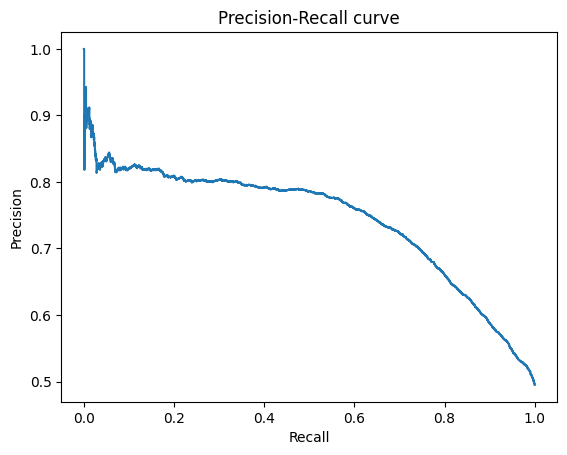

In [30]:
import matplotlib.pyplot as plt

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()


In [35]:
# Exemple : choisir un seuil qui donne un recall élevé (ici, le premier seuil où recall > 0.9)
target_recall = 0.6
# On compare recall[:-1] car thresholds a une valeur de moins que recall
mask = recall[:-1] > target_recall

if mask.any():  # S'il existe un seuil qui donne recall > 0.9
    threshold = thresholds[mask][0]
else:
    print("Aucun seuil ne permet d'atteindre recall >", target_recall)
    threshold = thresholds[-1]  # On prend le dernier seuil disponible

# Prédire avec le nouveau seuil
y_pred = (y_proba >= threshold).astype(int)

# Évaluer les performances
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6926
           1       0.49      1.00      0.66      6787

    accuracy                           0.49     13713
   macro avg       0.25      0.50      0.33     13713
weighted avg       0.24      0.49      0.33     13713



c:\Users\coule\Documents\projets\cardio-vasc-risks\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\coule\Documents\projets\cardio-vasc-risks\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\coule\Documents\projets\cardio-vasc-risks\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera